Dataanalys: Projekt - Figurer 


Huvudfråga: Är deltagare mindre benägna att välja den ansträngande uppgiften ju fler trials som gått? 


In [55]:
#Importera bibliotek för data och figurer
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [56]:
#Läs in CSV-fil till df
df = pd.read_csv("Study2.csv")

#Plocka ut kolumnerna som representerar de 8 försökenA
deck_cols = [
    "first_deckA_mental", "second_deckA_mental", "third_deckA_mental",
    "fourth_deckA_mental", "fifth_deckA_mental", "sixth_deckA_mental",
    "seventh_deckA_mental", "eigth_deckA_mental"
]
#Lista med kolumnnamn för de åtta trails som anger om deltagarna valde den ansträngande uppgiften

#Rensning, säkerställ numeriskt 0/1 genom att omvnadla varje cell till tal, ersätt tal som ej går att konvertera med NaN
df[deck_cols] = df[deck_cols].apply(pd.to_numeric, errors="coerce")


In [57]:
df["antal_anstrangande"] = df[deck_cols].sum(axis=1) #Summerar antal gånger varje delt valt ansträgande uppgift
df["andel_anstrangande"] = df["antal_anstrangande"] / len(deck_cols) #Delas med 8 (antal trials) för att få andel (0-1)

In [58]:
#Gör om till lång form, varje rad = ett enskilt val istället för en rad per deltagare. 
long_df = df.melt(id_vars=["PID"], value_vars=deck_cols,
                  var_name="trial", value_name="ansträngande_val")

#Skapar ny kolumn där varje deltagare får sina trials numerade 1-8
long_df["trial_num"] = long_df.groupby("PID").cumcount() + 1

#Gör värderna numeriska (100, 2, 0..) 
vals = pd.to_numeric(long_df["ansträngande_val"], errors="coerce")

#Jämför värde mot 0, positivt tal = 1, negativt tal = 0 
long_df["ansträngande_val"] = np.where(vals.isna(), np.nan, (vals > 0).astype(int))


#Räknar ut genomsnittet (andel) av ansträngande val för varje trial 
trend = long_df.groupby("trial_num", as_index=False)["ansträngande_val"].mean()


Koden använder vals.isna() som kollar för varje rad om värdet är NaN, jämför värdet mot 0 och ger True om värdet är positivt (1,2,100..) och False om 0 eller negativt. Dvs gör om kolumnen till rena tal, hanterar konstiga inmatningar och binärisera på säkert sätt utan att missa värden. 

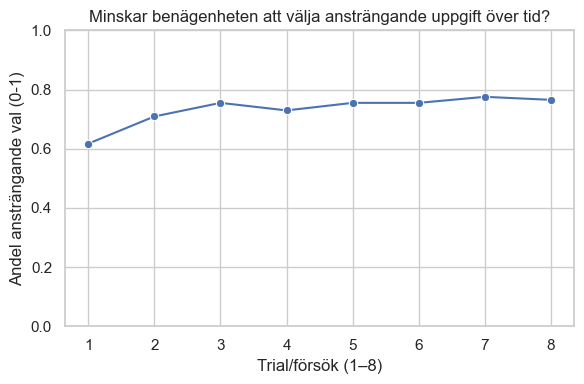

In [59]:
# Rita figuren 
sns.set(style="whitegrid")
plt.figure(figsize=(6,4))
sns.lineplot(data=trend, x="trial_num", y="ansträngande_val", marker="o")
plt.xlabel("Trial/försök (1–8)")
plt.ylabel("Andel ansträngande val (0-1)")
plt.title("Minskar benägenheten att välja ansträngande uppgift över tid?")
plt.ylim(0,1)
plt.tight_layout()
plt.show()

Linjeplott 
Visar: Hur andelen ansträngande val förändras över försök 1-8, förändring över tid. 
X-axel: Försök/trail 1-8 
Y-axel: Andel ansträngande val (0=ingen, 1=alla)

Början av kurvan (trial 1) visar startnivån, hur ofta dletagare valde den ansträngande uppgiften första gången. Vidare berättar kurvan om förändringen är linjär eller platåar ut. 

Tolkning:
Startar runt 0.6 (ca 60%) väljer ansträngande uppgift, därefter ökar andelen något (ca 75%) vid trial 3-4 vilket visar att deltagarena inte undviker ansträngande uppgift. Deltagare verkar mer villiga i början och håller en relativt stabil nivå. 

In [60]:
deck_cols = [
    "first_deckA_mental","second_deckA_mental","third_deckA_mental",
    "fourth_deckA_mental","fifth_deckA_mental","sixth_deckA_mental",
    "seventh_deckA_mental","eigth_deckA_mental"
]

#Förenkla data, 1 om deltagaren valde ansträngande uppgift och 0 om deltagaren inte valde den anstärngande uppgiften.
#Lambda funktionen för att gå igenom tabellen cell för cell och bestämma värde.
X = df[deck_cols].applymap(lambda v: 1 if pd.notna(v) and v > 1 else (0 if pd.notna(v) else pd.NA)).astype("Int64")
#.astype("Int64") gör om allt till heltal och tillåter att NaN finns kvar. (Heltal + saknade värden)


# 2) Andel per deltagare
df["andel_ansträngande"] = X.mean(axis=1)

/var/folders/02/nq6_l4rj6_v7y_wnf4ckdrj40000gn/T/ipykernel_82451/322942696.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X = df[deck_cols].applymap(lambda v: 1 if pd.notna(v) and v > 1 else (0 if pd.notna(v) else pd.NA)).astype("Int64")


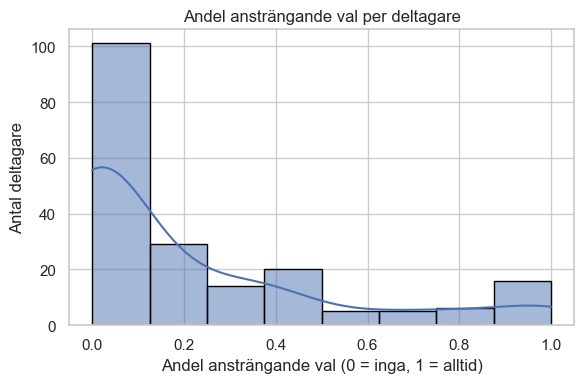

In [61]:
# 3) Plot
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(6,4))
sns.histplot(data=df, x="andel_ansträngande", bins=8, kde=True, edgecolor="black", ax=ax)
ax.set(
    title="Andel ansträngande val per deltagare",
    xlabel="Andel ansträngande val (0 = inga, 1 = alltid)",
    ylabel="Antal deltagare"
)
plt.tight_layout()
plt.show()

Histogram 
X-axel: Varje deltgares egen andel av ansträngande val (0 = aldrig, 1 = alltid)
Y-axel: Antal deltagare som har den andelen 
Blå kurva (KDE): Mjuk sammanfattning av fördelning 

Tolkning: 
Många deltagare ligger nära 0-0.2 vilket visar att de flesta ej väljer den ansträngande uppgiften. Få deltagare ligger högt 0.8-1.0 vilket innebär att gruppen är blandad men majoritet väljer icke-ansträngande uppgift. 


Sammanfattande tolkning 

Figur 1: Visar att andelen ansträngande val ligger relativt högt (0.6-0.8) och förblir relativt stabil över försök 1-8. Det finns alltså inget tydligt stöd för att deltagarna blir mindre benägna över tid. 

Figur 2: Visar däremot att fördelningen mellan deltagare är olika. Många väljer sällan ansträngande uppgift, medan ett fåtal ofta gör det. Det tyder på stora inviduella skillnader i benägenheten att välja kognitivt krävande uppgifter. 

Sammanfattningsvis verkar deltagarna hålla ett stabilt beteende genom studien. Deltagarna uppvisar ingen minskning i benägenheten att välja den ansträngande uppgiften över tid. Däremot finns det tydliga skillnader mellan individer, vissa personer tenderar att välja den ansträngande uppgiften oftare ön andra redan från början, vilket tyder på att människor skiljer sig i sin generella vilja att lägga ner mental ansträngning. 